In [2]:
import cv2

In [2]:
cap = cv2.VideoCapture(0)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow("frame",gray)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume we have the following set of documents
documents = [
    'The sky is blue',
    'The sun is bright',
    'The sun in the sky is bright',
    'We can see the shining sun, the bright sun'
]

# Create the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform the documents with the TfidfVectorizer
tfidf_matrix = vectorizer.fit_transform(documents)

# To view the TF-IDF scores
print(tfidf_matrix.toarray())

# To view the features (unique words in all documents)
print(vectorizer.get_feature_names_out())

[[0.65919112 0.         0.         0.         0.42075315 0.
  0.         0.51971385 0.         0.34399327 0.        ]
 [0.         0.52210862 0.         0.         0.52210862 0.
  0.         0.         0.52210862 0.42685801 0.        ]
 [0.         0.3218464  0.         0.50423458 0.3218464  0.
  0.         0.39754433 0.3218464  0.52626104 0.        ]
 [0.         0.23910199 0.37459947 0.         0.         0.37459947
  0.37459947 0.         0.47820398 0.39096309 0.37459947]]
['blue' 'bright' 'can' 'in' 'is' 'see' 'shining' 'sky' 'sun' 'the' 'we']


In [9]:
import cv2

# List of image filenames
image_filenames = ["obama0.jpeg", "obama1.jpeg", "obama2.jpeg", "obama3.jpeg", "obama4.jpeg", "obama5.jpeg"]

# Create a SIFT object
sift = cv2.SIFT_create()

for filename in image_filenames:
    # Load the image
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect and compute SIFT features
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # Draw the keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    # Display the image with keypoints
    cv2.imshow('Image with Keypoints', image_with_keypoints)
    print("Press any key to close the image window.")
    cv2.waitKey(0)

# Close all image windows
cv2.destroyAllWindows()

Press any key to close the image window.
Press any key to close the image window.
Press any key to close the image window.
Press any key to close the image window.
Press any key to close the image window.
Press any key to close the image window.


### Feature Extraction:
You can extract the descriptors for each image and use them as input for other machine learning algorithms. This can be helpful for tasks like image classification or clustering. Here's an example of how you can extract descriptors for each image:%macro

In [10]:
descriptors_list = []

for filename in image_filenames:
    # Load the image
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect and compute SIFT features
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # Store the descriptors in a list
    descriptors_list.append(descriptors)

# Perform further processing with the descriptors list
# ... (e.g., clustering, classification, etc.)

descriptors_list

[array([[51.,  4.,  1., ...,  0.,  0.,  2.],
        [52.,  6.,  0., ...,  0.,  0.,  0.],
        [11.,  8.,  0., ...,  0.,  0.,  7.],
        ...,
        [77.,  6.,  0., ...,  1.,  0.,  0.],
        [ 9.,  1.,  0., ...,  0.,  0.,  0.],
        [78.,  5.,  0., ...,  2.,  1.,  1.]], dtype=float32),
 array([[ 3., 57., 10., ...,  0.,  0.,  2.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ..., 44., 56., 14.],
        ...,
        [13.,  1.,  0., ...,  0.,  0.,  0.],
        [ 7.,  1.,  0., ...,  0.,  0.,  0.],
        [ 9.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 85.,  41.,   3., ..., 102.,  12.,   1.],
        [ 74.,   2.,   0., ...,   6.,   0.,   0.],
        [ 51.,   5.,   1., ...,  10.,   0.,   0.],
        ...,
        [  1.,   0.,   1., ...,   0.,   0.,   0.],
        [  2.,   0.,   0., ...,   1.,  12.,  30.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32),
 array([[ 0., 25., 14., ...,  2., 22., 76.],
        [ 0.,  0., 

### Feature Matching:
You can match the keypoints and descriptors between different images to find correspondences. This can be useful for tasks like image stitching or object recognition. Here's an example of how you can match keypoints between two images:

In [11]:
# Load two images
image1 = cv2.imread("obama0.jpeg")
image2 = cv2.imread("obama5.jpeg")

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect and compute SIFT features for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None)

# Display the matched image
cv2.imshow('Matched Image', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

After performing feature matching using the SIFT algorithm, the next steps typically involve estimating the transformation between the matched features and applying the transformation to align the images. Here's an example of how you can proceed with image alignment using the matched features:

In [12]:
import cv2
import numpy as np

# Load two images
image1 = cv2.imread("obama0.jpeg")
image2 = cv2.imread("obama5.jpeg")

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect and compute SIFT features for both images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract matched keypoints
src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate the transformation matrix using RANSAC
ransac_thresh = 5.0
M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, ransac_thresh)

# Apply the transformation to align the images
aligned_image = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

# Display the aligned image
cv2.imshow('Aligned Image', aligned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In this code, we first detect and compute the SIFT features for both images, just as before. Then, we perform feature matching using the BFMatcher and apply the ratio test to filter good matches.

Next, we extract the matched keypoints from the good matches and reshape them into the required format for the findHomography function, which estimates the transformation matrix. RANSAC is used as a robust estimation method to handle outliers in the matches.

With the estimated transformation matrix, we use the warpPerspective function to apply the transformation to the second image and align it with the first image. The resulting aligned image is displayed using imshow.

It's important to note that the success of image alignment depends on the quality and number of good matches obtained. Additionally, you may need to handle cases where no or very few good matches are found.

In [14]:
import cv2

# List of image filenames
image_filenames = ["hellokitty.png", "hellokittyclothes.jpeg", "hellokittybag.jpeg"]

# Create a SIFT object
sift = cv2.SIFT_create()

for filename in image_filenames:
    # Load the image
    image = cv2.imread(filename)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect and compute SIFT features
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # Draw the keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

    # Display the image with keypoints
    cv2.imshow('Image with Keypoints', image_with_keypoints)
    print("Press any key to close the image window.")
    cv2.waitKey(0)

# Close all image windows
cv2.destroyAllWindows()

Press any key to close the image window.
Press any key to close the image window.
Press any key to close the image window.


In [15]:
# Load two images
image1 = cv2.imread("hellokittybag.jpeg")
image2 = cv2.imread("hellokittyclothes.jpeg")

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect and compute SIFT features for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None)

# Display the matched image
cv2.imshow('Matched Image', matched_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
import cv2
import numpy as np

# Load two images
image1 = cv2.imread("hellokittybag.jpeg")
image2 = cv2.imread("hellokittyclothes.jpeg")

# Convert images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect and compute SIFT features for both images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)

# Create a BFMatcher object
bf = cv2.BFMatcher()

# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract matched keypoints
src_points = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# Estimate the transformation matrix using RANSAC
ransac_thresh = 5.0
M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, ransac_thresh)

# Apply the transformation to align the images
aligned_image = cv2.warpPerspective(image2, M, (image1.shape[1], image1.shape[0]))

# Display the aligned image
cv2.imshow('Aligned Image', aligned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Image Preprocessing

Images must be preprocessed before they can be used in machine learning models. This can include resizing, normalizing, augmenting, etc. You may skip or modify these steps as per your requirement.

In [2]:
# pip install opencv-python-headless numpy matplotlib tensorflow

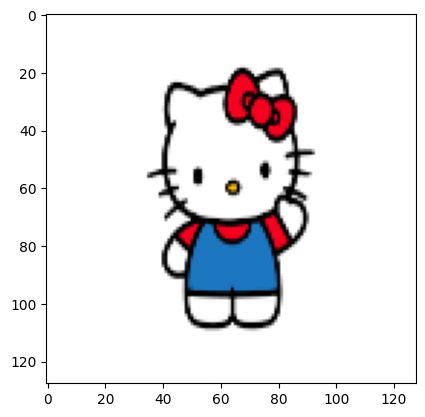

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
# img = cv2.imread('hellokitty.png', cv2.IMREAD_GRAYSCALE) 
img = cv2.imread('hellokitty.png') 

# Convert BGR image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize image
img = cv2.resize(img, (128, 128))

# Normalize image
img = img / 255.0

# Display image
plt.imshow(img)
plt.show()

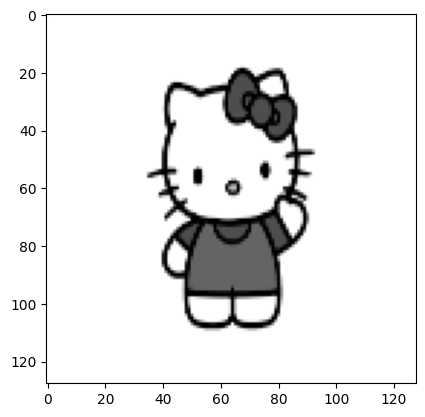

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('hellokitty.png', cv2.IMREAD_COLOR)

# Convert BGR image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize image
img_gray = cv2.resize(img_gray, (128, 128))

# Normalize image and convert to float32
img_gray = np.float32(img_gray / 255.0)

# Display grayscale image
plt.imshow(img_gray, cmap='gray')
plt.show()

### Feature Extraction using Harris Corner Detection

Harris Corner Detection is used to detect the corners in the image. These corners will be used as the features for the image.

**However, using raw pixel data from Harris Corner as features for a neural network is not optimal.** Feature vectors should be carefully designed, or better yet, CNN should be used for automatic feature extraction. In this case, CNN will be used for classification, and the features will be automatically learned.

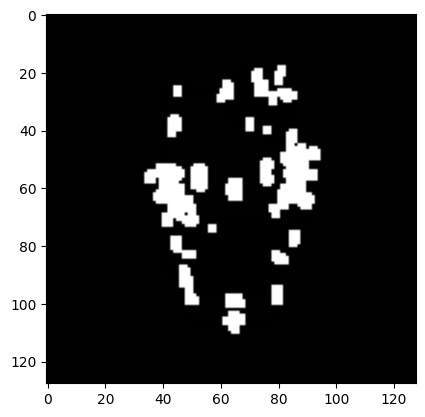

In [31]:
# Harris corner detection
dst = cv2.cornerHarris(img_gray, 2, 3, 0.04)

# result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img_gray[dst > 0.01 * dst.max()] = 255

# Display the image with corners detected
plt.imshow(img_gray, cmap='gray')
plt.show()

### Image Classification using Convolutional Neural Networks

CNNs are powerful models for image classification. They are capable of automatically learning and extracting features from images. The following code defines a simple CNN model using TensorFlow's Keras API:

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Define a simple sequential model
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2)) # 2 classes: Cats & Dogs

    return model

# Create model
model = create_model()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

You can train the model using your images. The images should be properly labeled, i.e., each image should be assigned a label (0 for cats, 1 for dogs, for example). Your images should also be split into training and validation sets:

In [ ]:
# Assuming train_images, train_labels are your training images and labels
# And test_images, test_labels are your testing (validation) images and labels

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))